In [1]:
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 50.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 75.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 48.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import ktrain
from ktrain import text

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df= pd.read_csv("/content/tweet_and_emotion.csv")

In [8]:
df.shape

(10624, 2)

In [9]:
print(df.emotions.value_counts())

fear       2252
neutral    2238
sadness    2198
joy        2125
anger      1811
Name: emotions, dtype: int64


In [10]:
data_set = df['tweet']
target= df['emotions']

In [11]:
class_names = ["fear","neutral","sadness","joy","anger"]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data_set, target , test_size=0.2 ,random_state=42)

In [13]:
x_train = x_train.tolist()
x_test = x_test.tolist()

y_train = y_train.tolist()
y_test = y_test.tolist()

In [14]:
encoding = {
  "fear":0,
  "neutral":1,
 "sadness":2,
  "joy":3,
 "anger":4,
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [15]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350,
                                                                       max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [16]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input-Token (InputLayer)    [(None, 350)]                0         []                            
                                                                                                  
 Input-Segment (InputLayer)  [(None, 350)]                0         []                            
                                                                                                  
 Embedding-Token (TokenEmbe  [(None, 350, 768),           2344089   ['Input-Token[0][0]']         
 dding)                       (30522, 768)]               6                                       
                                                                                                  
 Embedding-Segment (Embeddi  (None, 350, 768)             1536      ['Input-Segment[0][0]'] 

In [18]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

In [19]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1024
1417/1417 [==============================] - 767s 521ms/step - loss: 6.3893 - accuracy: 0.2866
Epoch 2/1024
1417/1417 [==============================] - 1s 3us/step - loss: 86.6103 - accuracy: 0.1667


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


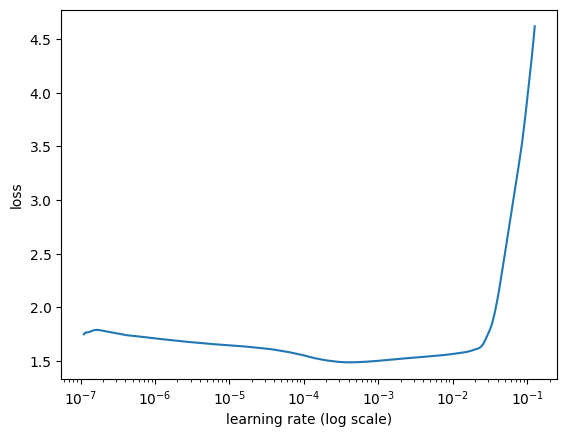

In [20]:
learner.lr_plot()

In [21]:
learner.fit_onecycle(1e-5, 3)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/3
1417/1417 [==============================] - 855s 588ms/step - loss: 1.3068 - accuracy: 0.4415 - val_loss: 0.7805 - val_accuracy: 0.7172
Epoch 2/3
1417/1417 [==============================] - 829s 585ms/step - loss: 0.6582 - accuracy: 0.7628 - val_loss: 0.5979 - val_accuracy: 0.7859
Epoch 3/3
1417/1417 [==============================] - 829s 585ms/step - loss: 0.4077 - accuracy: 0.8541 - val_loss: 0.6120 - val_accuracy: 0.7779


In [22]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

67/67 [==============================] - 64s 899ms/step
              precision    recall  f1-score   support

        fear       0.81      0.86      0.83       436
     neutral       0.69      0.77      0.73       451
     sadness       0.74      0.69      0.72       436
         joy       0.85      0.77      0.81       439
       anger       0.83      0.79      0.81       363

    accuracy                           0.78      2125
   macro avg       0.78      0.78      0.78      2125
weighted avg       0.78      0.78      0.78      2125



array([[376,  13,  22,   9,  16],
       [ 11, 348,  51,  33,   8],
       [ 33,  59, 303,  13,  28],
       [ 18,  67,   9, 339,   6],
       [ 27,  19,  26,   4, 287]])

In [23]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [24]:
predictor.save("models/tweet_emotion_model")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
